In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import f1 package
import fastf1 as ff1
from fastf1 import plotting
plotting.setup_mpl()

In [2]:
ff1.Cache.enable_cache('../F1/cache')

# Data Pre-Processing for FF1

In [3]:
f1_cal = ['BAHRAIN GP',
            'SAUDI ARABIAN GRAND PRIX',
            'AUSTRALIAN GP',
            'EMILIA ROMAGNA GRAND PRIX',
            'MIMI GRAND PRIX',
            'SPANISH GP',
            'MONACO GP',
            'AZERBAIJAN GP',
            'CANADIAN GP',
            'BRITISH GP',
            'AUSTRIAN GP',
            'FRENCH GRAND PRIX',
            'HUNGARIAN GP',
            'BELGIAN GP',
            'DUTCH GRAND PRIX',
            'ITALIAN GP',
            'SINGAPORE GP',
            'JAPANESE GP',
            'UNITED STATES GP',
            'MEXICAN GP',
            'BRAZILIAN GP']
            #'ABU DHABI GP]'

In [4]:
def get_race(year, race, weekend, LIMIT_OUTLIER = 1000):
    session = ff1.get_session(year, race, weekend)
    session.load()
    SAI = session.laps.pick_driver('SAI')
    PER = session.laps.pick_driver('PER')
    HAM = session.laps.pick_driver('HAM')
    LEC = session.laps.pick_driver('LEC')
    ALO = session.laps.pick_driver('ALO')
    NOR = session.laps.pick_driver('NOR')
    VER = session.laps.pick_driver('VER')
    MSC = session.laps.pick_driver('MSC')
    VET = session.laps.pick_driver('VET')
    MAG = session.laps.pick_driver('MAG')
    STR = session.laps.pick_driver('STR')
    LAT = session.laps.pick_driver('LAT')
    RIC = session.laps.pick_driver('RIC')
    TSU = session.laps.pick_driver('TSU')
    OCO = session.laps.pick_driver('OCO')
    GAS = session.laps.pick_driver('GAS')
    BOT = session.laps.pick_driver('BOT')
    RUS = session.laps.pick_driver('RUS')
    ZHO = session.laps.pick_driver('ZHO')
    ALB = session.laps.pick_driver('ALB')
    DEV = session.laps.pick_driver('DEV')
    HUL = session.laps.pick_driver('HUL')
    
    df_raceweek_local = pd.concat([SAI, PER, HAM, LEC, ALO, NOR, VER, MSC, VET,MAG,
                STR, LAT, RIC, TSU, OCO, GAS, BOT, RUS, ZHO, ALB, DEV, HUL])
    df_local.reset_index(inplace=True, drop=True)
    
    # convert LapTime in timedelta64 to float in seconds
    df_local['LapTime_seconds'] = df_local['LapTime'].dt.seconds*1000000 + df_local['LapTime'].dt.microseconds
    df_local['LapTime_seconds'] = df_local['LapTime_seconds']/1000000
    
    # buang data yg IsAccurate == False
    df_local = df_local.drop(df_local[df_local.IsAccurate == False].index)

    # fine tuning, buang outlier yg ga logis
    df_local = df_local.drop(df_local[df_local.LapTime_seconds > LIMIT_OUTLIER].index)

    # add column raceweek
    df_local['Raceweek'] = race

    # hitung ranks untuk kebutuhan sorting
    ranks = pd.DataFrame(df_local.groupby("Driver")["LapTime_seconds"].mean().fillna(0).sort_values(ascending=False)[::-1])
    ranks.reset_index(inplace=True)
    ranks = ranks.to_dict('list')

    return df_local

In [5]:
df_R = pd.DataFrame()
df_Q = pd.DataFrame()

In [6]:
# get RACE and QUALIFICATION session and export to csv
for raceweek in f1_cal:
    # get RACE data every race week and concat to df_R
    df_R_temp = get_race(2022, raceweek, 'R', 1000)
    df_R = pd.concat([df_R, df_R_temp])
    # get QUALIFICATION data every race week and concat to df_Q
    df_Q_temp = get_race(2022, raceweek, 'Q', 1000)
    df_Q = pd.concat([df_Q, df_Q_temp])

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.2.2]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_dat

In [9]:
df_R.to_csv("2022_race.csv")
df_Q.to_csv("2022_qualification.csv")

# Data Visualization

In [41]:
#color scheme
fer = ff1.plotting.team_color('ferrari')
rbr = ff1.plotting.team_color('RBR')
mer = ff1.plotting.team_color('mercedes')
alf = ff1.plotting.team_color('alfa romeo')
ast = ff1.plotting.team_color('aston martin')
mcl = ff1.plotting.team_color('mclaren')
alt = ff1.plotting.team_color('alphatauri')
wil = ff1.plotting.team_color('williams')
alp = ff1.plotting.team_color('alpine')
has = '#adadad' #has putih, ga keliatan, dibikin agak abu biar keliaan

In [50]:
# set palette dengan dictionary berdasarkan driver dan color scheme dari ff1
my_palette ={'SAI':fer,
'PER':rbr,
'HAM':mer,
'LEC':fer,
'ALO':alp,
'NOR':mcl,
'VER':rbr,
'MSC':has,
'VET':ast,
'MAG':has,
'STR':ast,
'LAT':wil,
'RIC':mcl,
'TSU':alt,
'OCO':alp,
'GAS':alt,
'BOT':alf,
'RUS':mer,
'ZHO':alf,
'ALB':wil,
'HUL':ast,
'DEV':wil}

In [57]:
def draw_boxplot(df, raceweek_selector):
    df_raceweek = df[df['Raceweek']==raceweek_selector]
    df_raceweek.groupby("Driver")["LapTime_seconds"].median().sort_values()
    
    # buang data yg IsAccurate == False
    df_raceweek = df_raceweek.drop(df_raceweek[df_raceweek.IsAccurate == False].index)

    # fine tuning, buang outlier yg ga logis
    #df_raceweek = df_raceweek.drop(df_raceweek[df_raceweek.LapTime_seconds > LIMIT_OUTLIER].index)
    
    # ranking untuk masing-masing Driver dari nilai median() LapTime_seconds
    ranks = df_raceweek.groupby("Driver")["LapTime_seconds"].median().fillna(0).sort_values(ascending=False)[::-1].index

    sns.set_style('dark')
    plt.figure(figsize=(16,8))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    ax = sns.boxplot(data=df_raceweek, x='Driver', y='LapTime_seconds', order=ranks, palette=my_palette)

    #ax.set_title(f"Race Pace - F1 {RACE} GP {YEAR}")
    ax.set_ylabel('Lap Time (seconds)', fontsize=14)
    ax.set_xlabel('Driver', fontsize=14)
    ax.xaxis.set_label_coords(.5, -.15)

    medians = df_raceweek.groupby("Driver")["LapTime_seconds"].median().sort_values()

    # label median LapTime
    ax.text(-2.4, df_raceweek.LapTime_seconds.min()-1.2, "Lap Time Median")
    for xtick in ax.get_xticks():
        ax.text(xtick,
            df_raceweek.LapTime_seconds.min()-1.2, #adjust y value offset disini
            round(medians[xtick], 3),
            horizontalalignment = 'center',
            size = 11,
            color = 'black')

    # Label median LapTime gap to leader
    leader_median = medians[0]
    ax.text(-2.4, df_raceweek.LapTime_seconds.min()-1.45, "Gap to Leader")
    for xtick in ax.get_xticks():
        ax.text(xtick,
            df_raceweek.LapTime_seconds.min()-1.45, #adjust y value offset disini
            "+" + str(round(medians[xtick] - leader_median, 3)),
            horizontalalignment = 'center',
            size = 11,
            color = 'black')

    ax.text(0.9, 0.1,'@primawanugroho', ha='center', va='center', transform=ax.transAxes)

    return plt

In [58]:
df = pd.read_csv('2022_race.csv')

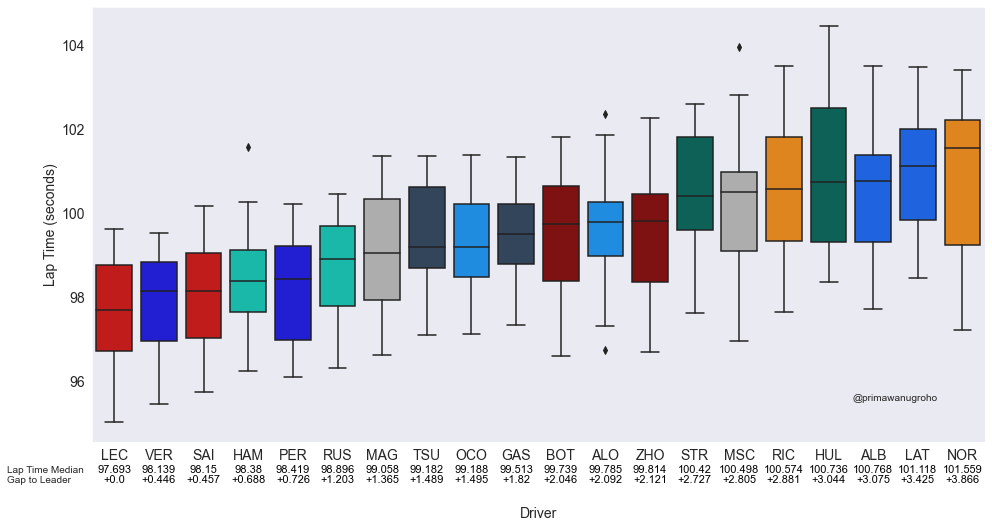

In [59]:
bahrain_pace = draw_boxplot(df, 'BAHRAIN GP')